In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def ring_a_radius(r, N):
    """
    Return a list of N points in the ring of radius r
    """
    theta = np.random.uniform(0, 2*np.pi, N)
    x = r*np.cos(theta)
    y = r*np.sin(theta)
    return x, y

In [3]:
def E_x_integrate_function(phi, x, y, z, a=0.5):
    num = x-a*np.cos(phi)
    den = (x**2+y**2+z**2+a**2+2*a*x*np.cos(phi)-2*a*y*np.sin(phi))**(3/2)
    return num/den

In [4]:
def E_y_integrate_function(phi, x, y, z, a=0.5):
    num = y-a*np.sin(phi)
    den = (x**2+y**2+z**2+a**2+2*a*x*np.cos(phi)-2*a*y*np.sin(phi))**(3/2)
    return num/den

In [5]:
def E_z_integrate_function(phi, x, y, z, a=0.5):
    num = z
    den = (x**2+y**2+z**2+a**2+2*a*x*np.cos(phi)-2*a*y*np.sin(phi))**(3/2)
    return num/den

In [6]:
def simpson(f, a, b,x,y,z, n=100):
    h = (b-a)/n
    phi = np.linspace(a, b, n+1)
    y = f(phi, x, y, z)
    return h/3 * np.sum(y[0:-1:2] + 4*y[1::2] + y[2::2])

In [7]:
def E_field(x, y, z, a=0.5):
    Ex = simpson(E_x_integrate_function, 0, 2*np.pi, x, y, z)/(2*np.pi)
    Ey = simpson(E_y_integrate_function, 0, 2*np.pi, x, y, z)/(2*np.pi)
    Ez = simpson(E_z_integrate_function, 0, 2*np.pi, x, y, z)/(2*np.pi)
    return Ex, Ey, Ez

In [8]:
print(E_field(0.6, 0.6, 1))

(0.3148518449860865, 0.21152494075605963, 0.4386473214517885)


In [9]:
N = 6
x = np.linspace(-0.6, 0.6, N)
y = np.linspace(-0.6, 0.6, N)
z = np.linspace(-0.6, 0.6, N)

In [10]:
Ex = np.zeros((N, N, N))
Ey = np.zeros((N, N, N))
Ez = np.zeros((N, N, N))

(-0.6, 0.6)

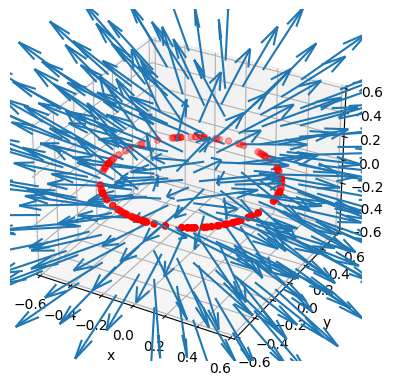

In [11]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(121, projection='3d')
#ax.scatter(X,Y)

for i in range(N):
    for j in range(N):
        for k in range(N):
            Ex[i,j,k], Ey[i,j,k], Ez[i,j,k] = E_field(x[i], y[j], z[k])
            ax.quiver(x[i], y[j], z[k], Ex[i,j,k], Ey[i,j,k], Ez[i,j,k], length=0.5, normalize=True)
x_r, y_r = ring_a_radius(0.5, 100)
ax.scatter(x_r, y_r ,color='red')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_xlim(-0.6, 0.6)
ax.set_ylim(-0.6, 0.6)
ax.set_zlim(-0.6, 0.6)

